# In NLTK, classifiers are defined using classes that implement the ClassifyI interface:

In [37]:
import nltk

In [38]:
train = [
(dict(a=1,b=1,c=1), 'y'),
(dict(a=1,b=1,c=1), 'x'),
(dict(a=1,b=1,c=0), 'y'),
(dict(a=0,b=1,c=1), 'x'),
(dict(a=0,b=1,c=1), 'y'),
(dict(a=0,b=0,c=1), 'y'),
(dict(a=0,b=1,c=0), 'x'),
(dict(a=0,b=0,c=0), 'x'),
(dict(a=0,b=1,c=1), 'y'),
]
test = [
(dict(a=1,b=0,c=1)), # unseen
(dict(a=1,b=0,c=0)), # unseen
(dict(a=0,b=1,c=1)), # seen 3 times, labels=y,y,x
(dict(a=0,b=1,c=0)), # seen 1 time, label=x
]


# The Naive Bayes classifier:

In [39]:
classifier = nltk.classify.NaiveBayesClassifier.train(train)
sorted(classifier.labels())

['x', 'y']

In [40]:
classifier.classify_many(test)

['y', 'x', 'y', 'x']

In [41]:
for pdist in classifier.prob_classify_many(test):
    print('%.4f %.4f' % (pdist.prob('x'), pdist.prob('y')))


0.3203 0.6797
0.5857 0.4143
0.3792 0.6208
0.6470 0.3530


In [42]:
classifier.show_most_informative_features()

Most Informative Features
                       c = 0                   x : y      =      2.0 : 1.0
                       c = 1                   y : x      =      1.5 : 1.0
                       a = 1                   y : x      =      1.4 : 1.0
                       b = 0                   x : y      =      1.2 : 1.0
                       a = 0                   x : y      =      1.2 : 1.0
                       b = 1                   y : x      =      1.1 : 1.0


# Test the Decision Tree classifier:

In [9]:
classifier = nltk.classify.DecisionTreeClassifier.train(train, entropy_cutoff=0,support_cutoff=0)
sorted(classifier.labels())

['x', 'y']

In [10]:
print(classifier)

c=0? .................................................. x
  a=0? ................................................ x
  a=1? ................................................ y
c=1? .................................................. y



In [18]:
classifier.classify_many(test)

['y', 'y', 'y', 'x']

# SklearnClassifier, which requires the scikit-learn package.

In [44]:
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
train_data = [({"a": 4, "b": 1, "c": 0}, "ham"),
              ({"a": 5, "b": 2, "c": 1}, "ham"),
              ({"a": 0, "b": 3, "c": 4}, "spam"),
              ({"a": 5, "b": 1, "c": 1}, "ham"),
              ({"a": 1, "b": 4, "c": 3}, "spam")]

classif = SklearnClassifier(BernoulliNB()).train(train_data)
test_data = [{"a": 3, "b": 2, "c": 1},
             {"a": 0, "b": 3, "c": 7}]
classif.classify_many(test_data)
#print(nltk.classify.accuracy(classif, test_data))

['ham', 'spam']

In [20]:
classif = SklearnClassifier(SVC(), sparse=False).train(train_data)
classif.classify_many(test_data)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


['ham', 'spam']

In [35]:
def gender_features(word):
    return {'last_letter': word[-1]}
gender_features('Shrek')

{'last_letter': 'k'}

In [39]:
from nltk.corpus import names
labeled_names = ([(name, 'male') for name in names.words('male.txt')] + [(name, 'female') for name in names.words('female.txt')])
import random
random.shuffle(labeled_names)
#labeled_names

In [37]:
print("There are %s samples in the dataset." % (len(labeled_names)))

There are 7944 samples in the dataset.


In [40]:
import nltk
featuresets = [(gender_features(n), gender) for (n, gender) in labeled_names]
train_set, test_set = featuresets[500:], featuresets[:500]
classifier = nltk.NaiveBayesClassifier.train(train_set)

In [42]:
print("Neo is classified as %s" % (classifier.classify(gender_features('Neo'))))

print("Trinity is classified as %s" % (classifier.classify(gender_features('Trinity'))))

Neo is classified as male
Trinity is classified as female


In [43]:
print(nltk.classify.accuracy(classifier, test_set))

0.77


In [7]:
import nltk
import random
from nltk.corpus import movie_reviews

documents = [(list(movie_reviews.words(fileid)), category)
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]

random.shuffle(documents)

print(documents[1])

all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
print(all_words.most_common(15))


(['annie', 'wilson', '(', 'cate', 'blanchett', ')', ',', 'a', 'widow', 'who', 'struggles', 'to', 'raise', 'her', 'children', 'in', 'a', 'small', 'town', 'in', 'georgia', 'is', 'asked', 'for', 'help', 'by', 'local', 'authorities', 'in', 'solving', 'the', 'case', 'of', 'a', 'missing', 'woman', '.', 'annie', 'is', 'something', 'of', 'a', 'psychic', ',', 'she', 'has', 'involuntary', 'bouts', 'with', 'the', 'supernatural', 'where', 'she', 'can', 'see', 'the', 'past', 'and', 'the', 'future', 'and', 'physically', 'feel', 'the', 'actions', 'happenning', 'to', 'her', 'she', 'envisions', '.', 'her', '"', 'gift', '"', 'leads', 'to', 'the', 'arrest', 'of', 'a', 'nasty', 'wife', 'beater', 'who', 'may', 'or', 'may', 'not', 'have', 'killed', 'the', 'pretty', 'rich', 'girl', 'found', 'in', 'the', 'swamp', 'on', 'his', 'property', '.', 'in', 'an', 'ultra', 'conservative', 'backwoods', 'town', 'will', 'her', 'testimony', 'based', 'on', 'her', 'psychic', 'visions', 'hold', 'up', 'in', 'court', '?', 'do',

In [8]:
 print(documents[1])

(['annie', 'wilson', '(', 'cate', 'blanchett', ')', ',', 'a', 'widow', 'who', 'struggles', 'to', 'raise', 'her', 'children', 'in', 'a', 'small', 'town', 'in', 'georgia', 'is', 'asked', 'for', 'help', 'by', 'local', 'authorities', 'in', 'solving', 'the', 'case', 'of', 'a', 'missing', 'woman', '.', 'annie', 'is', 'something', 'of', 'a', 'psychic', ',', 'she', 'has', 'involuntary', 'bouts', 'with', 'the', 'supernatural', 'where', 'she', 'can', 'see', 'the', 'past', 'and', 'the', 'future', 'and', 'physically', 'feel', 'the', 'actions', 'happenning', 'to', 'her', 'she', 'envisions', '.', 'her', '"', 'gift', '"', 'leads', 'to', 'the', 'arrest', 'of', 'a', 'nasty', 'wife', 'beater', 'who', 'may', 'or', 'may', 'not', 'have', 'killed', 'the', 'pretty', 'rich', 'girl', 'found', 'in', 'the', 'swamp', 'on', 'his', 'property', '.', 'in', 'an', 'ultra', 'conservative', 'backwoods', 'town', 'will', 'her', 'testimony', 'based', 'on', 'her', 'psychic', 'visions', 'hold', 'up', 'in', 'court', '?', 'do',

In [9]:
print(all_words.most_common(15))

[(',', 77717), ('the', 76529), ('.', 65876), ('a', 38106), ('and', 35576), ('of', 34123), ('to', 31937), ("'", 30585), ('is', 25195), ('in', 21822), ('s', 18513), ('"', 17612), ('it', 16107), ('that', 15924), ('-', 15595)]


In [61]:
word_features = list(all_words)[:2000]

def document_features(document): 
    document_words = set(document) 
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

# document_features(document) checks whether each word in the document
# is present in the word_features list.
##featuresets = [(document_features(doc), label) for (doc,label) in documents]
featuresets = [(document_features(doc), label) for (doc,label) in documents]
#print(featuresets[:1])
# where doc is the document file and label is either 'pos' or 'neg'

featuresets[:1]

[({'contains(plot)': False,
   'contains(:)': True,
   'contains(two)': False,
   'contains(teen)': False,
   'contains(couples)': True,
   'contains(go)': False,
   'contains(to)': True,
   'contains(a)': True,
   'contains(church)': False,
   'contains(party)': False,
   'contains(,)': True,
   'contains(drink)': False,
   'contains(and)': True,
   'contains(then)': False,
   'contains(drive)': False,
   'contains(.)': True,
   'contains(they)': True,
   'contains(get)': False,
   'contains(into)': True,
   'contains(an)': True,
   'contains(accident)': False,
   'contains(one)': True,
   'contains(of)': True,
   'contains(the)': True,
   'contains(guys)': False,
   'contains(dies)': False,
   'contains(but)': True,
   'contains(his)': True,
   'contains(girlfriend)': False,
   'contains(continues)': False,
   'contains(see)': False,
   'contains(him)': True,
   'contains(in)': True,
   'contains(her)': False,
   'contains(life)': False,
   'contains(has)': False,
   'contains(nightm

In [67]:
training_data = featuresets[200:]
test_data = featuresets[:200]
#print(training_data)

classifier = nltk.NaiveBayesClassifier.train(training_data)
print(nltk.classify.accuracy(classifier, test_data)*100)
#classifier.show_most_informative_features(7)


85.5


In [68]:
document = documents[1]

In [69]:
document_words =set(document)

TypeError: unhashable type: 'list'

In [46]:
from nltk.corpus import gutenberg
print(gutenberg.fileids())

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [47]:
emma = gutenberg.words('austen-emma.txt')
print(emma)

['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']', ...]


In [64]:
set(w)
features = [('contains(%s)' % word 'K') for word in set(w)]
features

SyntaxError: invalid syntax (<ipython-input-64-80c51481e3f0>, line 2)

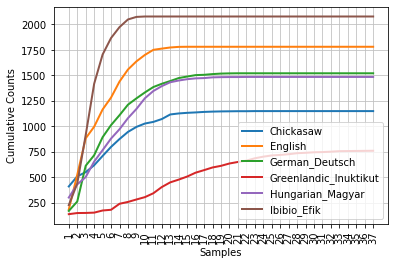

In [66]:
from nltk.corpus import udhr
languages = ['Chickasaw', 'English', 'German_Deutsch','Greenlandic_Inuktikut', 'Hungarian_Magyar', 'Ibibio_Efik']
cfd = nltk.ConditionalFreqDist((lang, len(word)) for lang in languages for word in udhr.words(lang + '-Latin1'))
cfd.plot(cumulative=True)